In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

## profiling

In [2]:
READHR = 'l2_tex_read_hit_rate'
READTR = 'l2_tex_read_transactions'
WRITEHR = 'l2_tex_write_hit_rate'
WRITETR = 'l2_tex_write_transactions'

In [3]:
#model = 'resnet50'
#model = 'resnet152'
model = 'vgg16'

In [4]:
onegpu = pd.read_csv('./src/'+model+'/l12_one.csv')
onegpu = onegpu.drop(0)
onegpu = onegpu.dropna(subset=[READHR,READTR,WRITEHR,WRITETR])
onegpu = onegpu.reset_index(drop=True)

multigpu = pd.read_csv('./src/'+model+'/l12_multi.csv')
multigpu = multigpu.drop(0)
multigpu = multigpu.dropna(subset=[READHR,READTR,WRITEHR,WRITETR])
multigpu = multigpu.reset_index(drop=True)


In [5]:
delimeter1 = find_delimeter(onegpu)
delimeter2 = find_delimeter(multigpu)

if delimeter1==delimeter2:
    delimeter = delimeter1
else:
    delimeter=int((delimeter1+delimeter2)/2)

In [6]:
RHR_one = onegpu[READHR].astype(float).to_numpy()
RTR_one = onegpu[READTR].astype(float).to_numpy()
WHR_one = onegpu[WRITEHR].astype(float).to_numpy()
WTR_one = onegpu[WRITETR].astype(float).to_numpy()

durations_one = onegpu['Duration'].astype(float).to_numpy()

In [7]:
RHR_multi = multigpu[READHR].astype(float).to_numpy()
RTR_multi = multigpu[READTR].astype(float).to_numpy()
WHR_multi = multigpu[WRITEHR].astype(float).to_numpy()
WTR_multi = multigpu[WRITETR].astype(float).to_numpy()

durations_multi = multigpu['Duration'].astype(float).to_numpy()

In [8]:
SuccessRT_one = RHR_one*RTR_one/100
SuccessWT_one = WHR_one*WTR_one/100
SuccessRT_multi = RHR_multi*RTR_multi/100
SuccessWT_multi = WHR_multi*WTR_multi/100

In [9]:
SuccessRT_one_time, delimeter_one = create_timearray(SuccessRT_one, durations_one, delimeter)
SuccessWT_one_time, delimeter_one = create_timearray(SuccessWT_one, durations_one, delimeter)

SuccessRT_multi_time, delimeter_multi = create_timearray(SuccessRT_multi, durations_multi, delimeter)
SuccessWT_multi_time, delimeter_multi = create_timearray(SuccessWT_multi, durations_multi, delimeter)

In [10]:
if delimeter_one==delimeter_multi:
    delimeter_time = delimeter_one
else:
    delimeter_time=int((delimeter_one+delimeter_multi)/2)

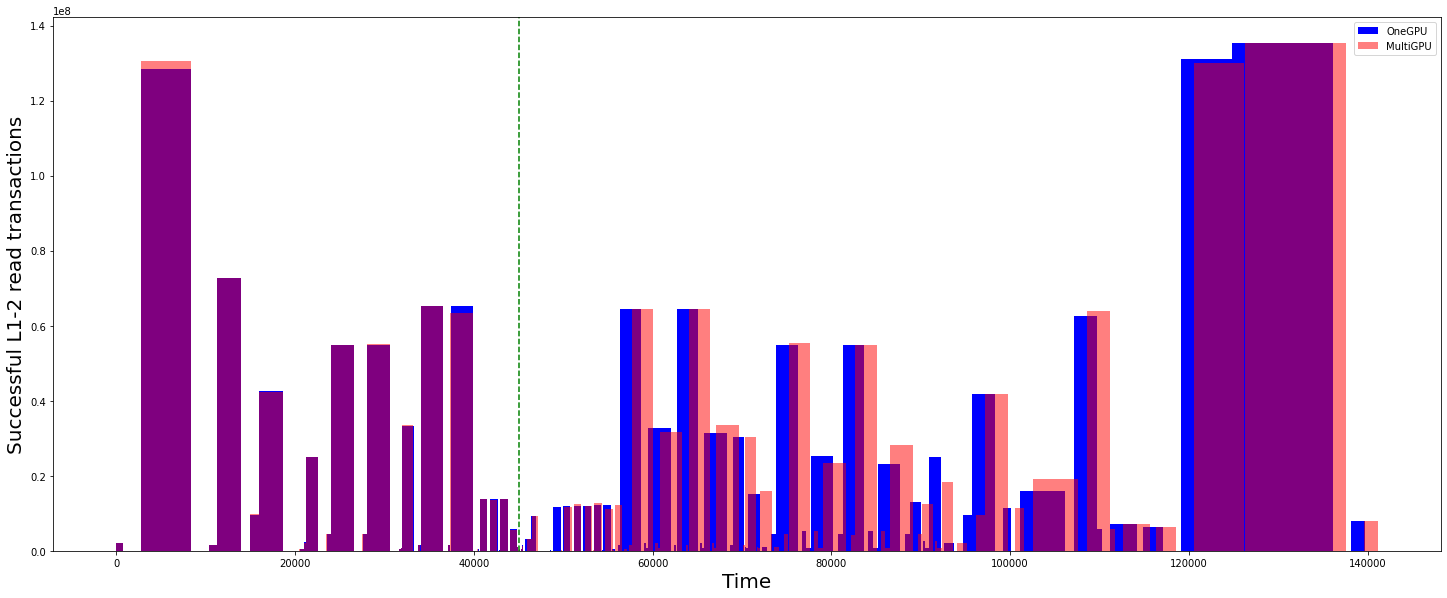

In [11]:
plot_bar_overlap(SuccessRT_one_time, SuccessRT_multi_time, delimeter_time, ylabel='Successful L1-2 read transactions', xlabel='Time', label1='OneGPU', label2='MultiGPU')

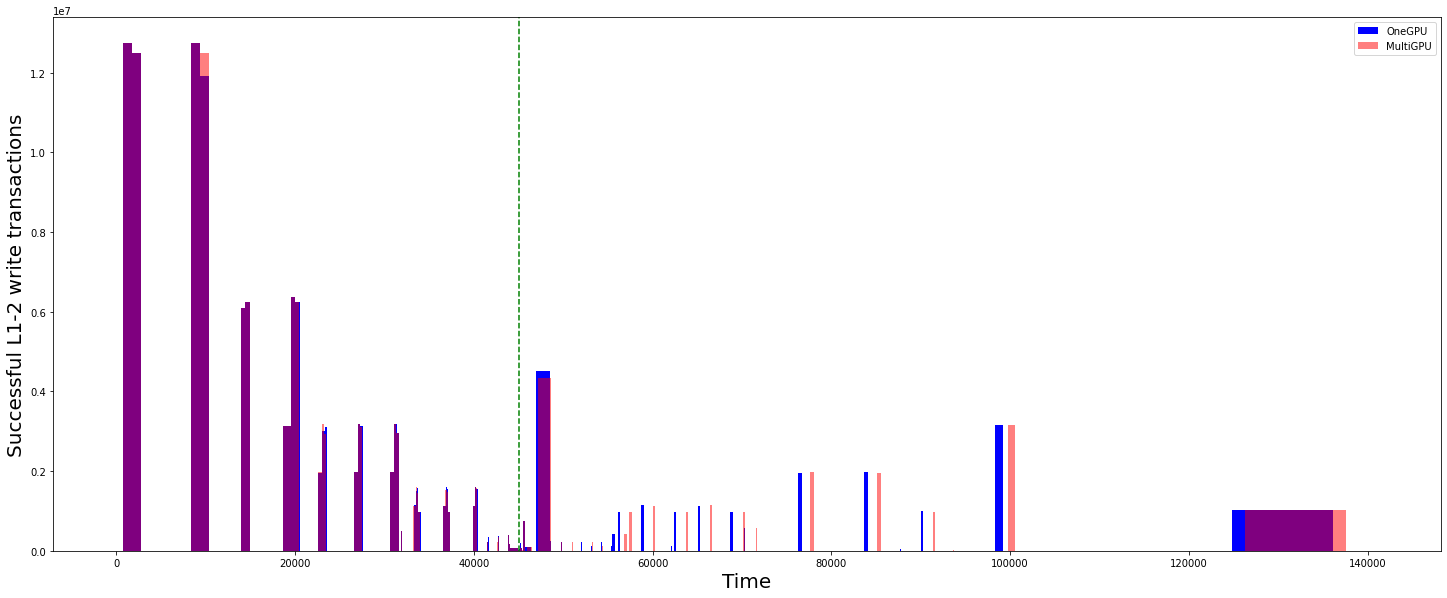

In [12]:
plot_bar_overlap(SuccessWT_one_time, SuccessWT_multi_time, delimeter_time, ylabel='Successful L1-2 write transactions', xlabel='Time', label1='OneGPU', label2='MultiGPU')

## intersection

<!-- a = onegpu['Name'].to_numpy()
b = multigpu['Name'].to_numpy()
_, idx_1, idx_4 = np.intersect1d(a,b,return_indices=True)
idx_1 = np.sort(idx_1)
idx_4 = np.sort(idx_4)
val_1 = val_1[idx_1]
val_4 = val_4[idx_4] -->